In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Baca gambar grayscale dari Google Drive
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Picture/ishowspeed.jpg', 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


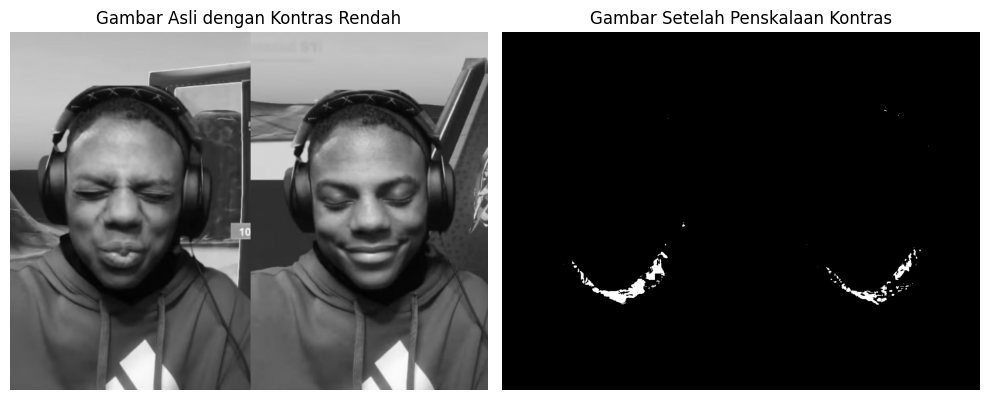

In [ ]:
# Operasi penskalaan kontras
min_val = np.min(img)  # Nilai intensitas minimum
max_val = np.max(img)  # Nilai intensitas maksimum
stretched_img = 255 * (img - min_val) / (max_val - min_val)

# Konversi kembali ke tipe uint8
stretched_img = np.uint8(stretched_img)

# Tampilkan gambar asli dan hasil penskalaan kontras
plt.figure(figsize=(10, 4))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Gambar Asli dengan Kontras Rendah'), plt.axis('off')

plt.subplot(122), plt.imshow(stretched_img, cmap='gray')
plt.title('Gambar Setelah Penskalaan Kontras'), plt.axis('off')

plt.tight_layout()
plt.show()

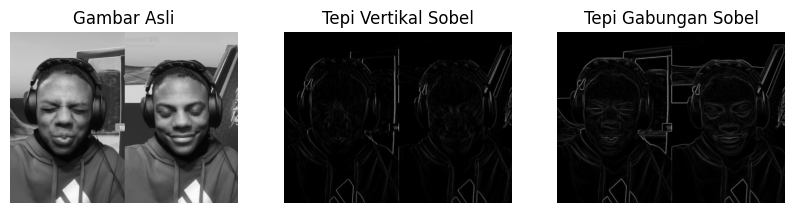

In [ ]:
# Terapkan operator Sobel untuk deteksi tepi
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)  # Deteksi tepi horizontal
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)  # Deteksi tepi vertikal

# Gabungkan gradien Sobel X dan Y
sobel_combined = cv2.magnitude(sobelx, sobely)

# Tampilkan gambar asli dan hasil deteksi tepi Sobel dengan ukuran lebih besar
plt.figure(figsize=(10, 4))  # Menetapkan ukuran gambar yang lebih besar

# Tampilkan gambar asli dan hasil deteksi tepi Sobel
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Gambar Asli'), plt.axis('off')

plt.subplot(132), plt.imshow(np.abs(sobelx), cmap='gray')
plt.title('Tepi Vertikal Sobel'), plt.axis('off')

plt.subplot(133), plt.imshow(sobel_combined, cmap='gray')
plt.title('Tepi Gabungan Sobel'), plt.axis('off')

plt.show()

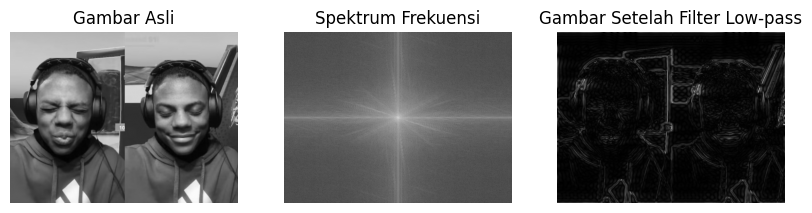

In [ ]:
# Terapkan Transformasi Fourier 2D
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

plt.figure(figsize=(10, 4))

# Menampilkan spektrum frekuensi
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Gambar Asli'), plt.axis('off')
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spektrum Frekuensi'), plt.axis('off')

# Buat filter Low-pass
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
fshift[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0

# Transformasi Fourier terbalik untuk mendapatkan kembali gambar
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Menampilkan hasil filter Low-pass
plt.subplot(133), plt.imshow(img_back, cmap='gray')
plt.title('Gambar Setelah Filter Low-pass'), plt.axis('off')
plt.show()
